In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# EDA -1  Bike Dataset

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
df.shape

(1061, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


1. What is the range of selling prices in the dataset?

In [ ]:
range = max(df['selling_price'])-min(df['selling_price'])
range

755000

2.  What is the median selling price for bikes in the dataset?

In [ ]:
median = np.median(df['selling_price'])
median

45000.0

3. What is the most common seller type?

In [ ]:
import statistics
mode = statistics.mode(df['selling_price'])
mode

25000

4.  How many bikes have driven more than 50,000 kilometers?

In [ ]:
No_of_bike = df[df['km_driven']>50000].shape[0]
No_of_bike

170

 5. What is the average km_driven value for each ownership type?

In [ ]:
average = df.groupby('owner')['km_driven'].mean()
average

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


6. What proportion of bikes are from the year 2015 or older?

In [ ]:
older_2015 = df[df['year']<=2015].shape[0]
p=df[df['year']<=2015].shape[0]/df.shape[0]
print(older_2015)
print(p)
#proportion = 601/1061

601
0.5664467483506126


7. What is the trend of missing values across the dataset?

In [ ]:
missing_value = df.isnull().sum()
missing_value

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


8.  What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
maximum_price = df['ex_showroom_price'].max()
Bike = df[df['ex_showroom_price']==maximum_price]['name'].values
print("Bike_name", Bike)
print("Price", maximum_price)

Bike_name ['Harley-Davidson Street Bob']
Price 1278000.0


9.  What is the total number of bikes listed by each seller type?

In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


10.  What is the relationship between selling_price and km_driven for first-owner bikes?

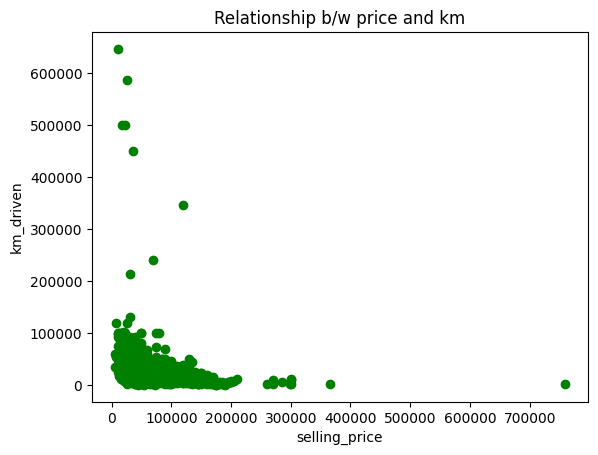

In [ ]:
x=df[df['owner']=='1st owner']
plt.scatter(x['selling_price'],x['km_driven'],color='green')
plt.xlabel('selling_price')
plt.ylabel('km_driven')
plt.title('Relationship b/w price and km')
plt.show()

11. Identify and remove outliers in the km_driven column using the IQR method.

In [ ]:
Q1 =df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
outlier_free_data = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]
print("Data after removing outliers:", outlier_free_data.shape[0])


Data after removing outliers: 1022


In [ ]:
outlier_free_data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

<Axes: xlabel='year', ylabel='selling_price'>

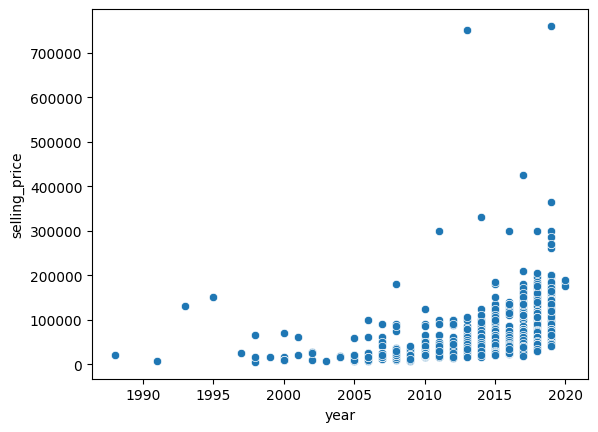

In [ ]:
sns.scatterplot(x='year', y='selling_price', data=df)

13.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?


In [ ]:
# Average depreciation based on bike's age
current_year = 2024
df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print("Average depreciation in selling price:\n", avg_depreciation)


Average depreciation in selling price:
 age
4     183333.333333
5     119689.511628
6      87660.374046
7      78962.121212
8      57924.126214
9      56313.131313
10     49121.348315
11     51802.816901
12     36720.619048
13     35859.631579
14     32350.877193
15     23295.454545
16     37004.166667
17     27768.181818
18     23821.052632
19     17669.230769
20     16000.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     25000.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64


14.  Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
avg_price = df.groupby('year')['selling_price'].mean()
df[df['selling_price'] > 1.5 * df['year'].map(avg_price)][['name', 'year', 'selling_price']]


,name,year,selling_price
2,Royal Enfield Classic Gunmetal Grey,2018,150000
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
18,Royal Enfield Classic Gunmetal Grey,2018,150000
23,Jawa Standard,2019,180000
...,...,...,...
979,Royal Enfield Thunder 500,2015,105000
981,Royal Enfield Thunder 350,2013,105000
983,Royal Enfield Classic 350,2015,100000
984,Royal Enfield Classic 500,2014,95000


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

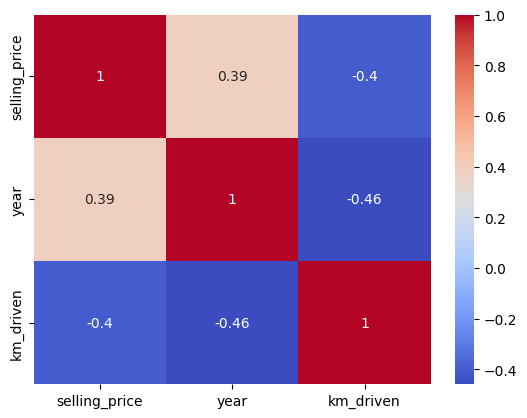

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(df[['selling_price', 'year', 'km_driven']].corr(), annot=True, cmap='coolwarm')
plt.show()


# EDA-2 Car Sales

In [ ]:
df1 = pd.read_csv("Car Sale.csv")
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [ ]:
df1.groupby('Dealer_Name')['Price ($)'].mean()

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [ ]:
variation_by_company = df1.groupby('Company')['Price ($)'].std()
highest_variation_company = variation_by_company.idxmax()
print("Company with highest price variation:", highest_variation_company)
print("Standard deviation of prices:", variation_by_company[highest_variation_company])


Company with highest price variation: Lincoln
Standard deviation of prices: 19658.050211265567


3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

In [ ]:
df1.groupby('Transmission')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


4. What is the distribution of car prices across different regions?

In [ ]:
df1.groupby('Dealer_Region')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


5. What is the distribution of cars based on body styles?

In [ ]:
df1['Body Style'].value_counts()

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


6. How does the average selling price of cars vary by customer gender and   annual income?

In [ ]:
df1.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [ ]:
price_distribution_by_region = df1.groupby('Dealer_Region')['Price ($)'].describe()
number_of_cars_by_region = df1['Dealer_Region'].value_counts()
print("Price distribution by region:")
print(price_distribution_by_region)
print("Number of cars sold by region:")
print(number_of_cars_by_region)

Price distribution by region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000

8. How does the average car price differ between cars with different engine sizes?

In [ ]:
df1.groupby('Engine')['Price ($)'].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


9. How do car prices vary based on the customer’s annual income bracket?

In [ ]:
df1.groupby('Annual Income')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Annual Income,,,,,,,,
10080,1.0,22801.000000,NaN,22801.0,22801.0,22801.0,22801.0,22801.0
13500,5273.0,27878.981415,14904.756077,1200.0,18000.0,22001.0,34000.0,85001.0
24000,1.0,61001.000000,NaN,61001.0,61001.0,61001.0,61001.0,61001.0
85000,1.0,43000.000000,NaN,43000.0,43000.0,43000.0,43000.0,43000.0
106000,1.0,46001.000000,NaN,46001.0,46001.0,46001.0,46001.0,46001.0
...,...,...,...,...,...,...,...,...
6600000,1.0,39000.000000,NaN,39000.0,39000.0,39000.0,39000.0,39000.0
6800000,1.0,15000.000000,NaN,15000.0,15000.0,15000.0,15000.0,15000.0
7650000,1.0,21000.000000,NaN,21000.0,21000.0,21000.0,21000.0,21000.0


10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [ ]:
top_5_car_models = df1['Model'].value_counts().head(5).index
price_distribution_top_5_models = df1[df1['Model'].isin(top_5_car_models)].groupby('Model')['Price ($)'].describe()
print("Top 5 car models and their price distribution:")
print(price_distribution_top_5_models)

Top 5 car models and their price distribution:
            count          mean           std      min      25%      50%  \
Model                                                                      
Diamante    418.0  22268.303828   9770.768958  12000.0  18000.0  19001.0   
Passat      391.0  19600.728900   8218.521683   9000.0  12001.0  20000.0   
Prizm       411.0  22838.457421   8012.531045  15000.0  16000.0  22000.0   
Ram Pickup  383.0  27820.864230  13297.609534  16000.0  19000.0  21000.0   
Silhouette  411.0  29858.513382  17940.571762  12000.0  14001.0  25000.0   

                75%      max  
Model                         
Diamante    22000.0  49801.0  
Passat      27001.0  32501.0  
Prizm       25000.0  44700.0  
Ram Pickup  39300.0  57750.0  
Silhouette  34500.0  60750.0  


11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [ ]:
df1.groupby(['Engine', 'Color'])['Price ($)'].std()

Engine                     Color     
DoubleÂ Overhead Camshaft  Black         12418.674126
                           Pale White    14402.413401
                           Red           13499.354247
Overhead Camshaft          Black         17457.405345
                           Pale White    13000.103061
                           Red           17346.642554
Name: Price ($), dtype: float64

12. Is there any seasonal trend in car sales based on the date of sale?

In [ ]:
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
seasonal_sales_trend = df1.groupby('Month')['Car_id'].count()
seasonal_sales_trend

,Car_id
Month,
1,790
2,735
3,1535
4,1655
5,1895
6,1715
7,1725
8,1705
9,3305


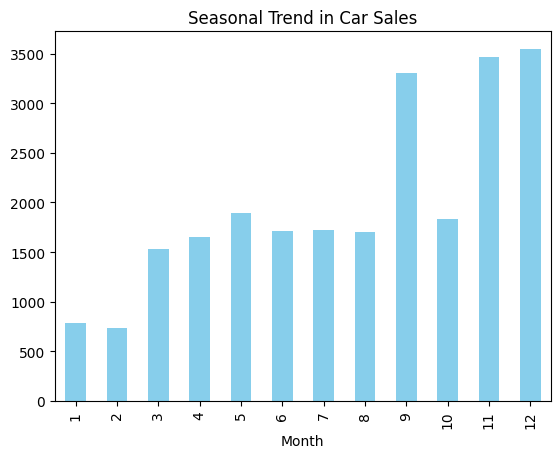

In [ ]:
seasonal_sales_trend.plot(kind='bar', title='Seasonal Trend in Car Sales', color='skyblue')
plt.show()


13. How does the car price distribution change when considering different combinations of body style and transmission type?

                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                           

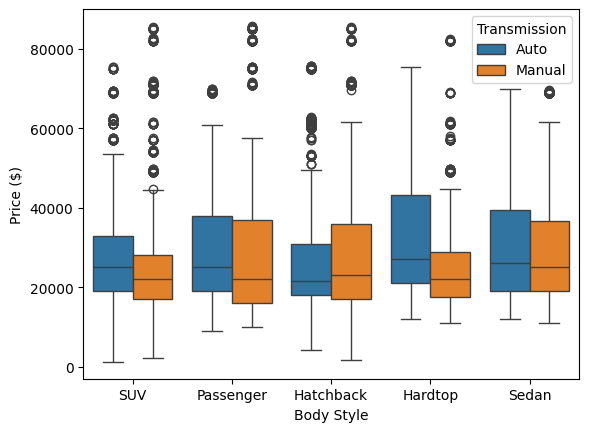

In [ ]:
price_distribution = df1.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
print(price_distribution)
import seaborn as sns
sns.boxplot(data=df1, x='Body Style', y='Price ($)', hue='Transmission')
plt.show()


14.  What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [ ]:
df1['Engine_Numeric'] = df1['Engine'].astype('category').cat.codes
correlation_matrix = df1[['Price ($)', 'Engine_Numeric', 'Annual Income']].corr()
print("Correlation between car price, engine size, and annual income:")
print(correlation_matrix)

Correlation between car price, engine size, and annual income:
                Price ($)  Engine_Numeric  Annual Income
Price ($)        1.000000       -0.011271       0.012065
Engine_Numeric  -0.011271        1.000000      -0.006598
Annual Income    0.012065       -0.006598       1.000000


15. How does the average car price vary across different car models and engine types?

In [ ]:
df1.groupby(['Model', 'Engine'])['Price ($)'].mean()

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64

# EDA -3 Amazon Sales

In [2]:
df2=pd.read_csv("amazon.csv")
df2

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

1. What is the average rating for each product category?

In [7]:
df2.groupby('category')['rating'].mean()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


2. What are the top rating_count products by category?

In [16]:

df2["rating_count"] = pd.to_numeric(df2["rating_count"], errors="coerce")
top_products = df2.loc[df2.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count"]]
top_products


,category,product_name,rating_count
900,Computers&Accessories|Accessories&Peripherals|...,Lapster USB 3.0 sata Cable for 2.5 inch SSD an...,817.0
32,Computers&Accessories|Accessories&Peripherals|...,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
743,Computers&Accessories|Accessories&Peripherals|...,Amazon Basics Magic Slate 8.5-inch LCD Writing...,401.0
653,Computers&Accessories|Accessories&Peripherals|...,STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse...,491.0
940,Computers&Accessories|Accessories&Peripherals|...,HP 330 Wireless Black Keyboard and Mouse Set w...,427.0
...,...,...,...
1279,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0
1317,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Proven® Copper + Mineral RO+UV+UF 10 to 12 Lit...,535.0
1424,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,KENT POWP-Sediment Filter 10'' Thread WCAP,490.0
808,OfficeProducts|OfficePaperProducts|Paper|Copy&...,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,388.0


3. What is the distribution of discounted prices vs. actual prices?

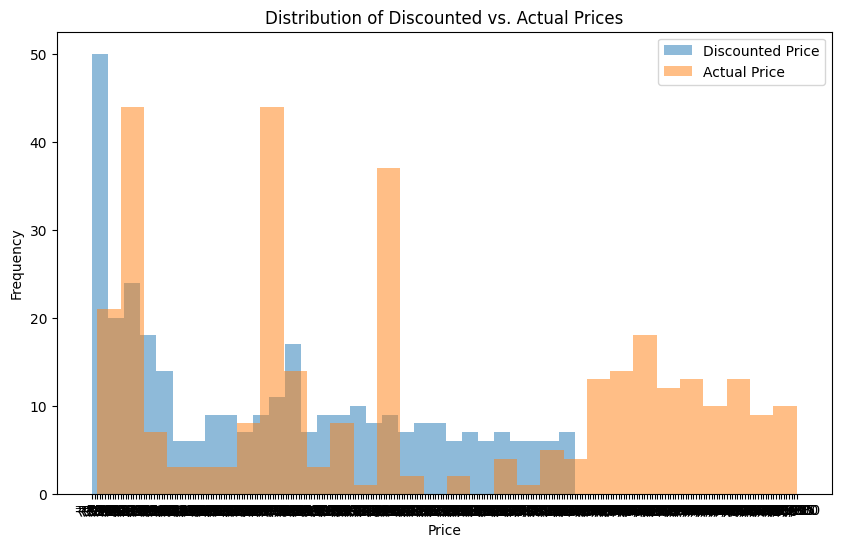

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df2["discounted_price"], bins=30, alpha=0.5, label="Discounted Price")
plt.hist(df2["actual_price"], bins=30, alpha=0.5, label="Actual Price")
plt.legend()
plt.title("Distribution of Discounted vs. Actual Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


4.  How does the average discount percentage vary across categories?

In [31]:
a = df2.groupby("category")["discount_percentage"].mean()
print(a)

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables                             NaN
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                              NaN
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|GraphicTablets                       NaN
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|MousePads   NaN
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MouseSets                   NaN
                                                                                                                ..
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|HandheldVacuums          NaN
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterFilters&Purifiers                          NaN
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPur

5. What are the most popular product names?

In [35]:
popular_products = df2.nlargest(5, "rating_count")
popular_products[["product_name", "rating_count"]]


,product_name,rating_count
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0
750,Eveready Red 1012 AAA Batteries - Pack of 10,989.0
1059,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976.0
32,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
151,Zoul USB Type C Fast Charging 3A Nylon Braided...,974.0


6. What are the most popular product keywords?

In [38]:
from collections import Counter

keywords = df2["product_name"].str.split().explode()
popular_keywords = Counter(keywords).most_common(10)
print(popular_keywords)


[('for', 183), ('with', 149), ('&', 95), ('and', 75), ('Cable', 74), ('USB', 72), ('|', 71), ('Remote', 64), ('C', 63), ('Compatible', 63)]


7. What are the most popular product reviews?

In [43]:
popular_reviews = df2["review_title"].value_counts().head(5)
popular_reviews


,count
review_title,
"Good cable for car,Good substitute for orginal,Better Value for money Product,Way better than the original,Absolutely amazing.,Namm hi kafi hai,Very good,As the names say Durable cell it a durable cable ;-)",3
"Great Cable, Charging Speeds Could Be Better,Good,A good cable.,One of the best type c cable,Works as intended.,A good buy. The extra length helps a lot.,Good,Ok",3
"Get it with bundled discounts.,Heating & Touch screen,Buy for normal usage. NOT FOR CAMERA,The phone is a good device and I am happy with the purchase.,Average quality.,Exlent mobile,Valueable buy,A GOOD AND AFFORDABLE PRODUCT",3
"Very good product.,Using as a spare cable in car,Sturdy, Durable, Fast Charging!,Good brand,It’s like original apple cable,One of the best wire ..,Super well build. Quality product worth the money,Good product",3
"Good product,Its good, but micro usb doesn't fit my phone.,Good and useful item,It is very best cable,good,2 in 1 Charging Cable.,Sturdy cable overall,Nice & Best Charger Cabel",3


 8. What is the correlation between discounted_price and rating?

In [44]:
df2["discounted_price"].corr(df2["rating"])

nan

9. what are the Top 5 categories based on the highest ratings?  

In [46]:
df2.groupby("category")["rating"].mean().nlargest(5)

,rating
category,
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",5.00
Electronics|Mobiles&Accessories|MobileAccessories|Photo&VideoAccessories|SelfieSticks,4.60
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.50
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterFilters&Purifiers,4.45
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,4.40


10. Identify any potential areas for improvement or optimization based on the data analysis.


In [47]:
# Analyze categories with low ratings
low_rating_categories = df2.groupby("category")["rating"].mean().nsmallest(5)

# Analyze products with low rating_count
low_popularity_products = df2[df2["rating_count"] < 10][["product_name", "rating_count"]]

# Display insights
print("Categories with low average ratings:", low_rating_categories)
print("Products with very low popularity:", low_popularity_products.head(5))


Categories with low average ratings: category
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers                   3.225
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders    3.300
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                     3.500
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders             3.500
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MiniFoodProcessors&Choppers     3.500
Name: rating, dtype: float64
Products with very low popularity:                                            product_name  rating_count
174   Syncwire LTG to USB Cable for Fast Charging Co...           5.0
299   WANBO X1 Pro (Upgraded) | Native 1080P Full HD...           7.0
1070  Lifelong LLQH925 Dyno Quartz Heater 2 Power se...           4.0
1121  C (DEVICE) Lint Remover for Woolen Clothes, El...           6.0
1222  Kitchenwell Multipurpose Portable Electronic D...

# EDA - 4 Spotify

In [50]:
df3 = pd.read_csv("spotify.csv")
df3

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [53]:
df4 = df3.dropna()
df4 = df3.drop_duplicates()
df4.shape


(413, 5)

2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

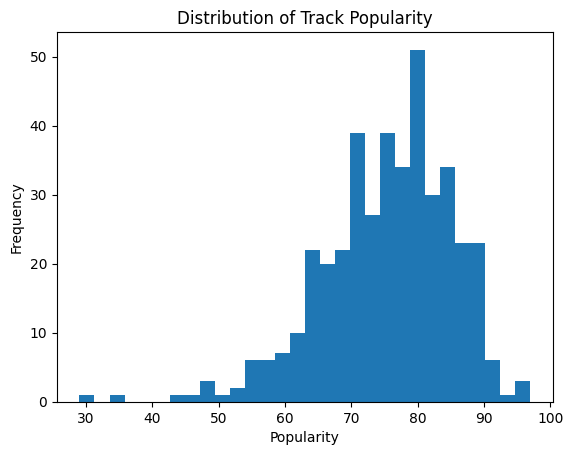

In [58]:
plt.hist(df3["Popularity"], bins=30)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

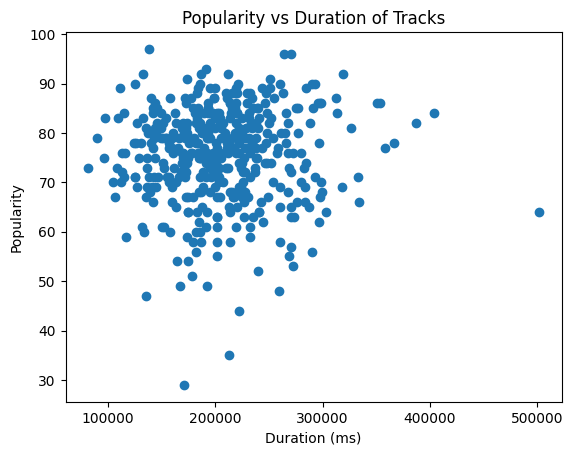

In [62]:
plt.scatter(df3["Duration (ms)"], df3["Popularity"])
plt.title("Popularity vs Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

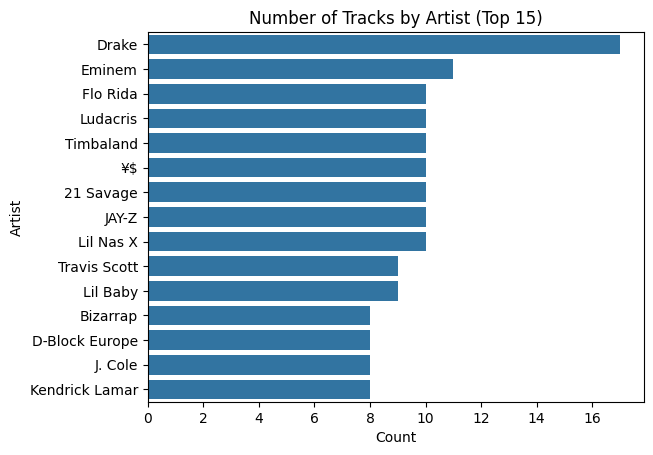

In [69]:
import seaborn as sns

# Countplot for artist track count
sns.countplot(y=df3["Artist"], order=df3["Artist"].value_counts().index[:15])
plt.title("Number of Tracks by Artist (Top 15)")
plt.xlabel("Count")
plt.ylabel("Artist")
plt.show()


5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [74]:

df3.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [77]:
top_artists = df3["Artist"].value_counts().head(5).index
df3[df3["Artist"].isin(top_artists)].groupby("Artist")["Popularity"].mean()



,Popularity
Artist,
Drake,82.882353
Eminem,83.636364
Flo Rida,78.000000
Ludacris,63.000000
Timbaland,69.000000


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [78]:
# Most popular track for each of the top 5 artists
most_popular_tracks = df3[df3["Artist"].isin(top_artists)].sort_values("Popularity", ascending=False)
popular_tracks_by_artist = most_popular_tracks.groupby("Artist").first()[["Track Name", "Popularity"]]

# Display result
print(popular_tracks_by_artist)


                                        Track Name  Popularity
Artist                                                        
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
Flo Rida                        Low (feat. T-Pain)          84
Ludacris                              My Chick Bad          67
Timbaland                            The Way I Are          85


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

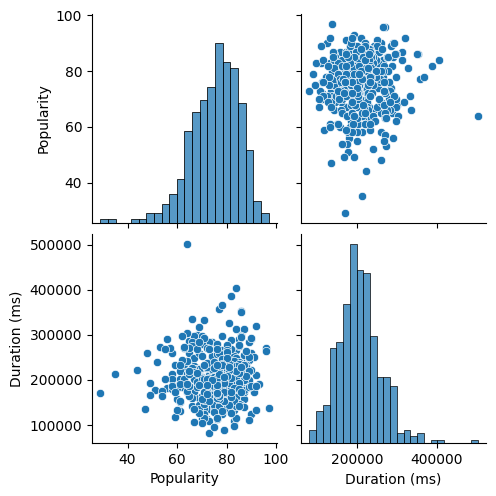

In [81]:
sns.pairplot(df3[["Popularity", "Duration (ms)"]])
plt.show()


9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or viollin plot.

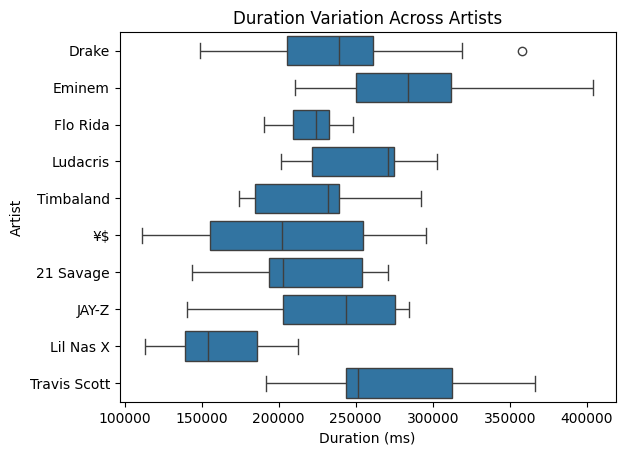

In [85]:
# Box plot for duration by artist
sns.boxplot(y="Artist", x="Duration (ms)", data=df3, order=df3["Artist"].value_counts().index[:10])
plt.title("Duration Variation Across Artists")
plt.xlabel("Duration (ms)")
plt.ylabel("Artist")
plt.show()


10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

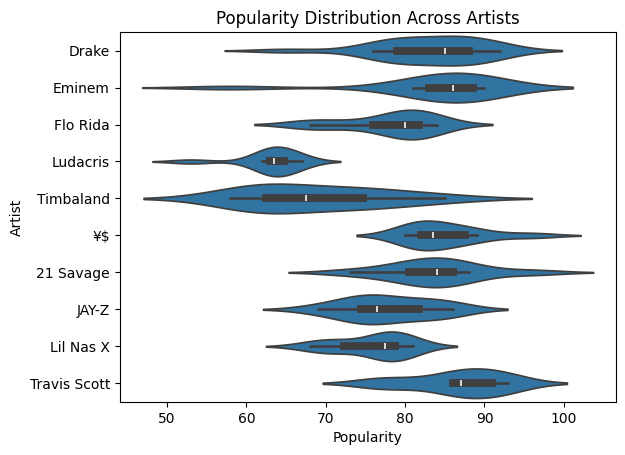

In [84]:
sns.violinplot(y="Artist", x="Popularity", data=df3, order=df3["Artist"].value_counts().index[:10], scale="width")
plt.title("Popularity Distribution Across Artists")
plt.xlabel("Popularity")
plt.ylabel("Artist")
plt.show()
